## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [10]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

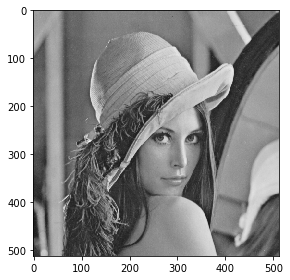

In [30]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
io.imshow(lena_im)

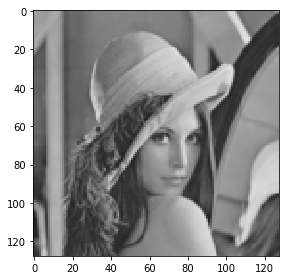

In [31]:
resize_bilinear=misc.imresize(lena_im, 0.25, interp='bilinear')
io.imshow(resize_bilinear)

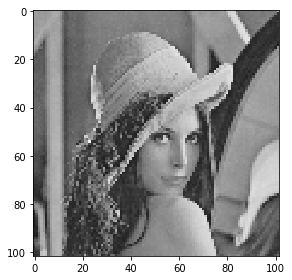

In [32]:
resize_nearest=misc.imresize(lena_im, 20, interp='nearest')
io.imshow(resize_nearest)

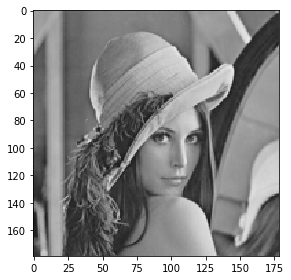

In [33]:
resize_bicubic=misc.imresize(lena_im, 35, interp='bicubic')
io.imshow(resize_bicubic)

**Q.2 Similar to the function of `my_blending.m` that you saw before define your function of blending ** 

**Therefore define three functions `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


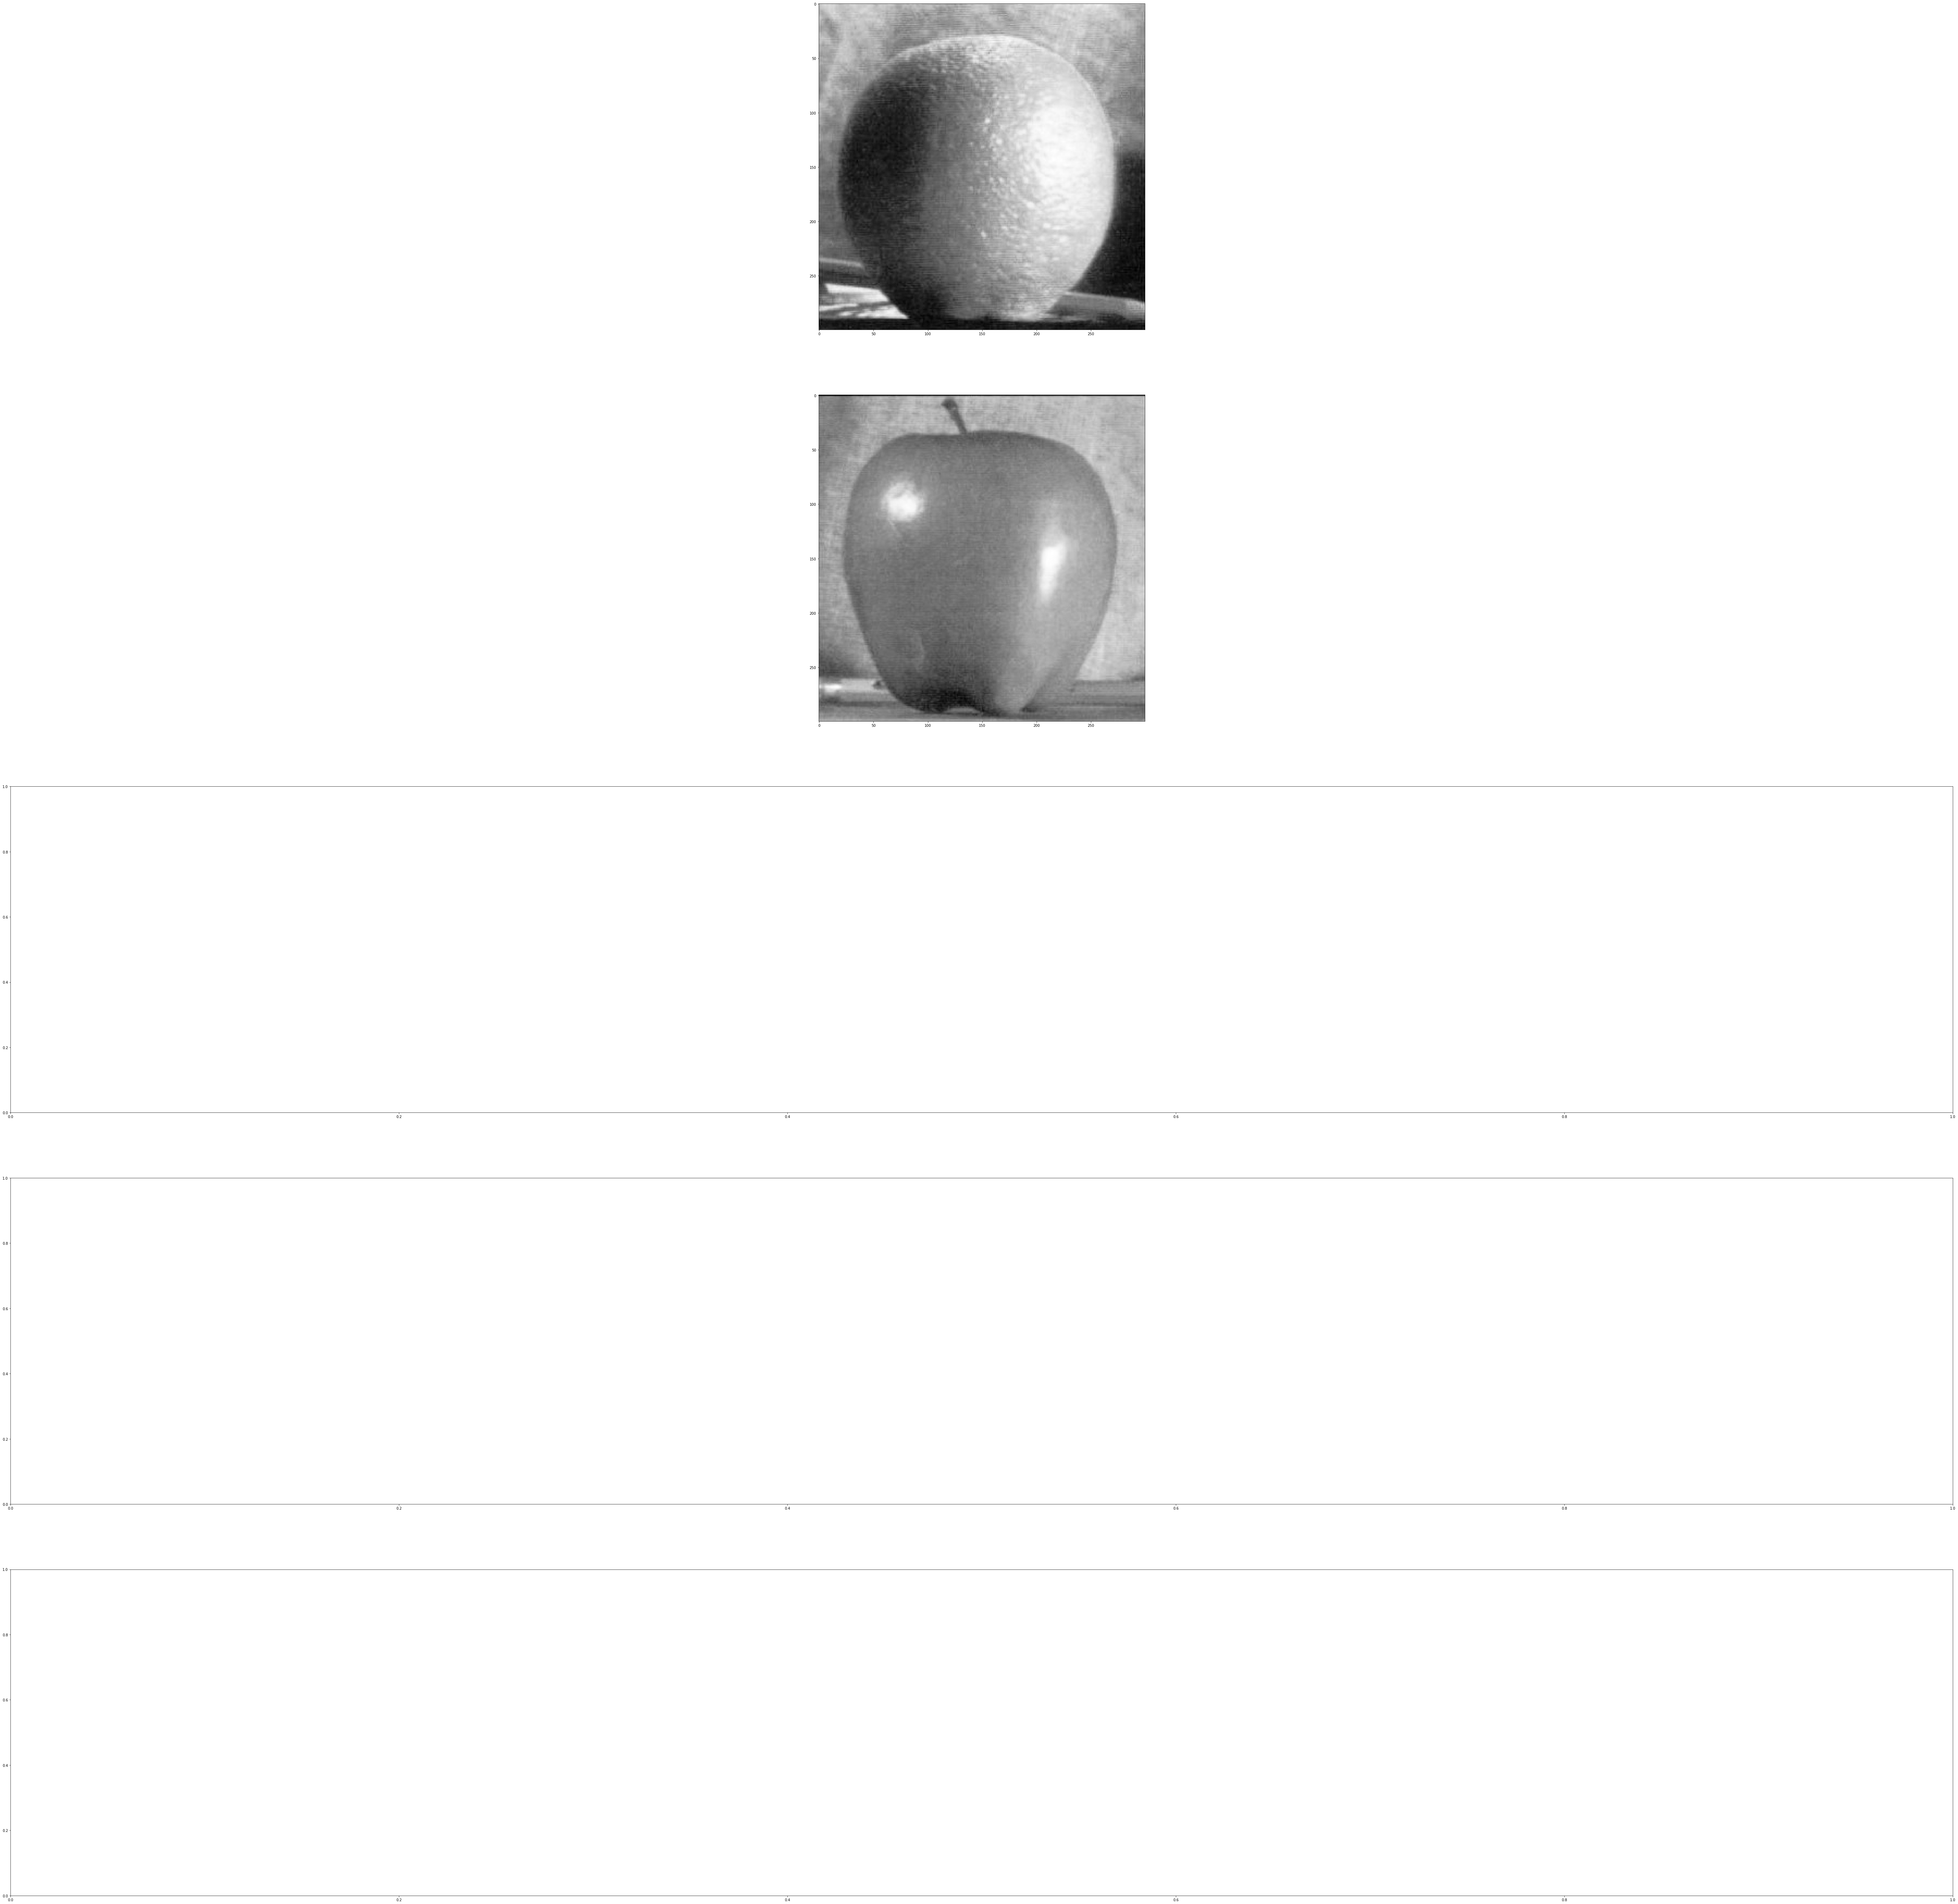

In [50]:
img_path = './images/'
img_name = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name), as_grey=True)

img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name), as_grey=True)


fig, axes = plt.subplots(5,1, figsize=(100, 100))
axes = axes.ravel()
axes[0].imshow(orange_im, cmap= cm.Greys_r)
axes[1].imshow(apple_im, cmap= cm.Greys_r)